In [1]:
from IPython.core.display import HTML
with open ("../style.css", "r") as file:
    css = file.read()
HTML(css)

# Visualize the Architecture of a Neural Network

In [2]:
import graphviz as gv

The function $\texttt{generateNN}(\texttt{Topology})$ takes a 
*network topology* `Topology` as its argument and draws a graph of the 
resulting *fully connected feed-forward* neural net.  A *network topology* is a list of numbers specifying the number of neurons of each layer.
For example,  the network topology `[3, 8, 6, 2]` specifies a neural network with three layers of neurons.
The network has $3$ input nodes, the first hidden layer has $8$ neurons, the second hidden layer has $6$ neurons, and 
the output layer has $2$ neurons.

In [3]:
def generateNN(Topology):
    L = len(Topology)
    input_layer   = ['i' + str(i) for i in range(1, Topology[0]+1)]
    hidden_layers = [['h' + str(k+1) + ',' + str(i) for i in range(1, s+1)] 
                                                    for (k, s) in enumerate(Topology[1:-1])]
    output_layer  = ['o' + str(i) for i in range(1, Topology[-1]+1)]
    nng = gv.Graph()
    nng.attr(rankdir='LR', splines='false')
    # create nodes for input layer
    for n in input_layer:
        nng.node(n, label='', shape='point', width='0.05')
    # create nodes for hidden layers
    for NodeList in hidden_layers:
        for n in NodeList:
            nng.node(n, label='', shape='circle', width='0.1')
    # create nodes for output layer
    for n in output_layer:
        nng.node(n, label='', shape='circle', width='0.1')
    # connect input layer to first hidden layer
    for n1 in input_layer:
        for n2 in hidden_layers[0]:
            nng.edge(n1, n2)
    # connect hidden layers d to hidden layer d+1
    for d in range(0, L-3):
        for n1 in hidden_layers[d]:
            for n2 in hidden_layers[d+1]:
                nng.edge(n1, n2)
    # connect output layer
    for n1 in hidden_layers[L-3]:
        for n2 in output_layer:
            nng.edge(n1, n2)
    return nng

In [5]:
Topology = [3, 6, 4, 2]

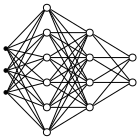

In [6]:
nn1 = generateNN(Topology)
nn1

In [7]:
Topology = [8, 12, 8, 6, 3]

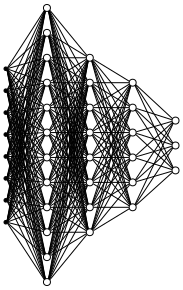

In [8]:
nn2 = generateNN(Topology)
nn2

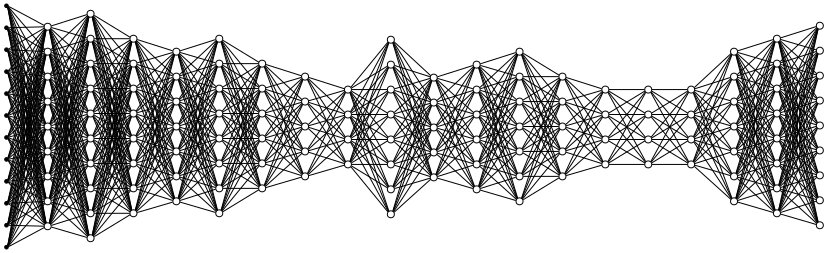

In [9]:
Topology = [12, 9, 10, 8, 7, 8, 6, 5, 4, 8, 5, 6, 7, 5, 4, 4, 4, 7, 8, 9]
nn3 = generateNN(Topology)
nn3